Step : 1

In [116]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
df_Sagar = pd.read_csv('./breast_cancer.csv')

Step : 2

In [117]:
# Display the column names
df_Sagar.columns

Index(['ID', 'thickness', 'size', 'shape', 'Marg', 'Epith', 'bare', 'b1',
       'nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [118]:
# Display the column types
df_Sagar.dtypes

ID            int64
thickness     int64
size          int64
shape         int64
Marg          int64
Epith         int64
bare         object
b1            int64
nucleoli      int64
Mitoses       int64
class         int64
dtype: object

In [143]:
df_Sagar

,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [120]:
# Display the statistics of the numeric fields (mean, min, max, median, count..etc.)

df_Sagar.describe()

,ID,thickness,size,shape,Marg,Epith,b1,nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


step :3 Data Pre-Processing and Visualization

In [121]:
# Preprocess the data
# Replace '?' with NaN for missing values
df_Sagar['bare'] = df_Sagar['bare'].replace('?',np.nan).astype('float')
df_Sagar['bare'].isna().sum()

16

In [122]:
# Fill the NaN values with the median of that column
df_Sagar['bare'] = df_Sagar['bare'].replace(np.nan,df_Sagar['bare'].median())
df_Sagar['bare'].isna().sum()

0

In [123]:
# Drop the irrelevant 'ID' column
df_Sagar = df_Sagar.drop('ID',axis=1)

<Axes: xlabel='thickness', ylabel='Count'>

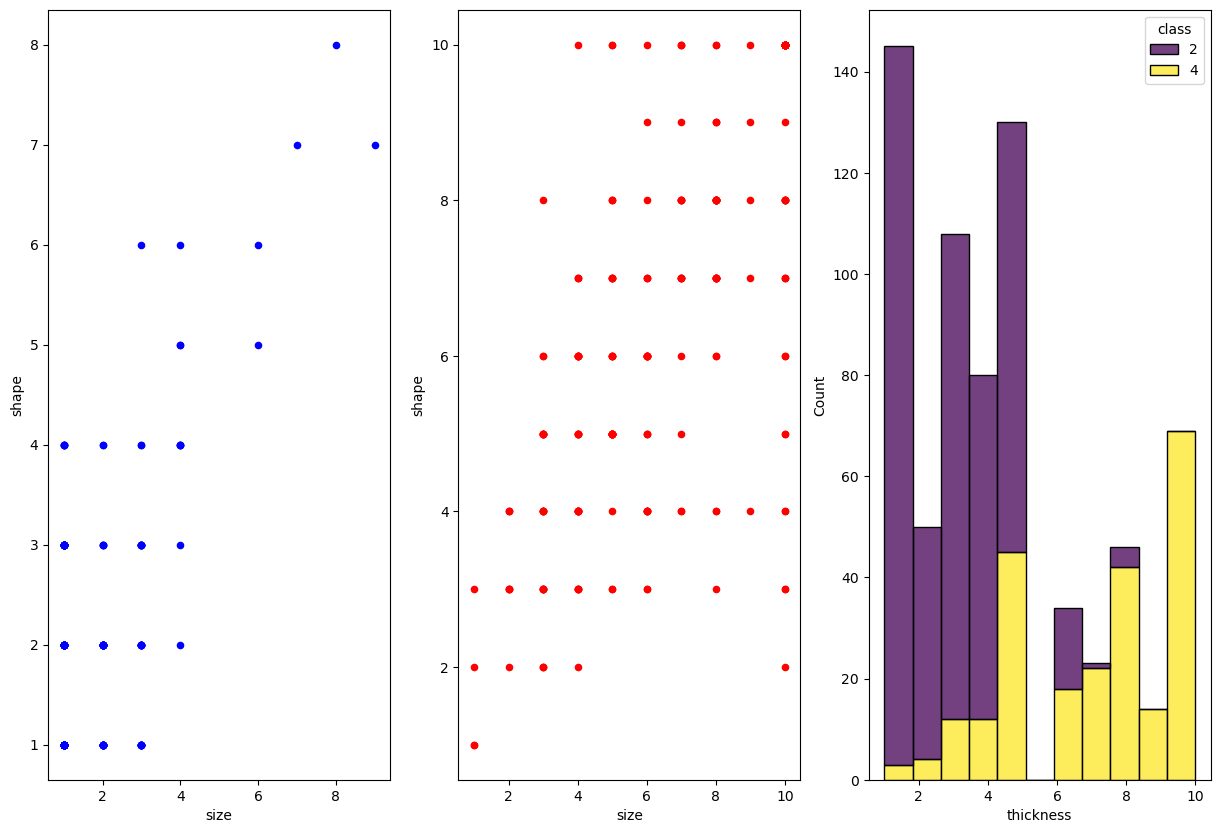

In [124]:
# split the data in based on benign and malignant cases [benign:2, malignant:4]

benign_df = df_Sagar[df_Sagar['class'] == 2]
malignant_df = df_Sagar[df_Sagar['class'] == 4]

#plot some charts to explore the data and find insights among the 2 cases.
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axes_benign = benign_df.plot(kind='scatter', x='size', y='shape',color='blue', ax=axs[0])
axes_malignant = malignant_df.plot(kind='scatter',x='size', y='shape', color='red', ax=axs[1])
sns.histplot(df_Sagar, x='thickness', hue='class', multiple='stack', ax=axs[2], palette='viridis')


In [125]:
# Split the data into features and target
feature_set_Sagar = df_Sagar.iloc[:,:-1]
feature_set_Sagar
y_target = df_Sagar['class']

In [126]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(feature_set_Sagar,y_target,test_size=0.2, train_size=0.8, random_state=32)
print(X_train.shape)
print(x_test.shape)


# Train an SVM classifier with a linear kernel
from sklearn import svm
clf_linear_Sagar = svm.SVC(kernel='linear', C=0.1)
clf_linear_Sagar.fit(X_train,y_train)
y_train_predict = clf_linear_Sagar.predict(X_train)
y_test_predict = clf_linear_Sagar.predict(x_test)

# Evaluate the linear kernel model on the testing set
from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

(559, 9)
(140, 9)
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       372
           4       0.95      0.96      0.96       187

    accuracy                           0.97       559
   macro avg       0.97      0.97      0.97       559
weighted avg       0.97      0.97      0.97       559

              precision    recall  f1-score   support

           2       0.95      0.98      0.97        86
           4       0.96      0.93      0.94        54

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [127]:
# Train an SVM classifier with a RBF kernel
clf_rbf_Sagar = svm.SVC(kernel='rbf')
clf_rbf_Sagar.fit(X_train,y_train)

y_train_predict_rbf = clf_rbf_Sagar.predict(X_train)
y_test_predict_rbf = clf_rbf_Sagar.predict(x_test)

# Evaluate the RBF kernel model on the testing set
print(classification_report(y_train,y_train_predict_rbf))
print(classification_report(y_test,y_test_predict_rbf))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       372
           4       0.96      0.98      0.97       187

    accuracy                           0.98       559
   macro avg       0.97      0.98      0.98       559
weighted avg       0.98      0.98      0.98       559

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        86
           4       0.95      0.96      0.95        54

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [128]:
# Train an SVM classifier with a Poly kernel
clf_poly_Sagar = svm.SVC(kernel='poly')
clf_poly_Sagar.fit(X_train,y_train)
y_train_predict_poly = clf_poly_Sagar.predict(X_train)
y_test_predict_poly = clf_poly_Sagar.predict(x_test)

# Evaluate the Poly kernel model on the testing set
print(classification_report(y_train,y_train_predict_poly))
print(classification_report(y_test,y_test_predict_poly))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       372
           4       0.97      0.96      0.96       187

    accuracy                           0.98       559
   macro avg       0.98      0.97      0.97       559
weighted avg       0.98      0.98      0.98       559

              precision    recall  f1-score   support

           2       0.91      0.98      0.94        86
           4       0.96      0.85      0.90        54

    accuracy                           0.93       140
   macro avg       0.94      0.91      0.92       140
weighted avg       0.93      0.93      0.93       140



In [33]:
# Train an SVM classifier with a Sigmoid kernel
clf_sigmoid_Sagar = svm.SVC(kernel='sigmoid')
clf_sigmoid_Sagar.fit(X_train,y_train)

y_train_sigmoid_predict = clf_sigmoid_Sagar.predict(X_train)
y_test_sigmoid_predict = clf_sigmoid_Sagar.predict(x_test)

# Evaluate the Sigmoid kernel model on the testing set
print(classification_report(y_train,y_train_sigmoid_predict))
print(classification_report(y_test,y_test_sigmoid_predict))

              precision    recall  f1-score   support

           2       0.59      0.71      0.64       372
           4       0.01      0.01      0.01       187

    accuracy                           0.48       559
   macro avg       0.30      0.36      0.33       559
weighted avg       0.39      0.48      0.43       559

              precision    recall  f1-score   support

           2       0.55      0.78      0.65        86
           4       0.00      0.00      0.00        54

    accuracy                           0.48       140
   macro avg       0.28      0.39      0.32       140
weighted avg       0.34      0.48      0.40       140



Assignment – exercise2:

In [129]:
# Load the breast cancer dataset into data_Sagar_df2 for Exercise:2
data_Sagar_df2 = pd.read_csv('./breast_cancer.csv')
data_Sagar_df2

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [130]:
# Replace '?' with NaN in the 'bare' column of the DataFrame and convert the column to float type
data_Sagar_df2['bare'] = df_Sagar['bare'].replace('?',np.nan).astype('float')

# Drop the irrelevant 'ID' column
data_Sagar_df2 = data_Sagar_df2.drop('ID',axis=1)
data_Sagar_df2

,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [131]:
# Separate the features and the target variable
data_Sagar_df2_features = data_Sagar_df2.iloc[:,:-1]

# Extract the 'class' column as the target variable
y_df2_target = data_Sagar_df2['class']

print(data_Sagar_df2_features)
print(y_df2_target)


     thickness  size  shape  Marg  Epith  bare  b1  nucleoli  Mitoses
0            5     1      1     1      2   1.0   3         1        1
1            5     4      4     5      7  10.0   3         2        1
2            3     1      1     1      2   2.0   3         1        1
3            6     8      8     1      3   4.0   3         7        1
4            4     1      1     3      2   1.0   3         1        1
..         ...   ...    ...   ...    ...   ...  ..       ...      ...
694          3     1      1     1      3   2.0   1         1        1
695          2     1      1     1      2   1.0   1         1        1
696          5    10     10     3      7   3.0   8        10        2
697          4     8      6     4      3   4.0  10         6        1
698          4     8      8     5      4   5.0  10         4        1

[699 rows x 9 columns]
0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int6

In [132]:
# Split the dataset into training and testing sets using sklearn train_test_split:
X_df2_train,X_df2_test,y_df2_train,y_df2_test = train_test_split(data_Sagar_df2_features,y_df2_target,train_size=0.8,test_size=0.2,random_state=32)

print(X_df2_train.shape)
print(X_df2_test.shape)


(559, 9)
(140, 9)


In [133]:
# Import necessary modules for data imputation and column transformation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer object named trfm_Sagar_1 to handle missing values
# SimpleImputer fills missing values (np.nan) in the 'bare' with the median value of that column
# The 'remainder = passthrough' keeps all other columns unchanged in the transformation process
trfm_Sagar_1 = ColumnTransformer([('impute_bare',SimpleImputer(missing_values=np.nan,strategy='median'),[5])],remainder='passthrough')

In [134]:
# Import the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Define a ColumnTransformer object named trfm_Sagar_2 to scale the first 9 columns
# Also StandardScaler is applied to normalize these columns to have a mean of 0 and a standard deviation of 1
trfm_Sagar_2 = ColumnTransformer([
    ('scale_data', StandardScaler(), slice(0, 9))
], remainder='passthrough')

# converted target training data to nd array as well.
y_df2_train = np.asarray(y_df2_train)

In [135]:
# Import the Pipeline class to create a sequence of data preprocessing and modeling steps
from sklearn.pipeline import Pipeline

# Define num_pipe_Sagar, a pipeline combining two transformation steps:
# 'trfm_Sagar_1' for imputing missing values in the 'bare' column with the median of that column
# 'trfm_Sagar_2' for scaling the first 9 columns of the dataset to have a mean of 0 and a standard deviation of 1
num_pipe_Sagar = Pipeline(steps=[
    ('trfm_Sagar_1',trfm_Sagar_1),
    ('trfm_Sagar_2',trfm_Sagar_2)
])


# Define pipe_svm_Sagar pipeline that includes the num_pipe_Sagar for preprocessing
# and SVM classifier with a specified random_state = 32 (my last 2 ID numbers)
# This setup ensures that data preprocessing and model training are executed as a single workflow
pipe_svm_Sagar = Pipeline(steps=[
    ('num_pipe_Sagar',num_pipe_Sagar),
    ('svm',svm.SVC(random_state=32))
])

# Fit the combined preprocessing and SVM classification pipeline to the training data
pipe_svm_Sagar.fit(X_df2_train,y_df2_train)


Pipeline(steps=[('num_pipe_Sagar',
                 Pipeline(steps=[('trfm_Sagar_1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('impute_bare',
                                                                   SimpleImputer(strategy='median'),
                                                                   [5])])),
                                 ('trfm_Sagar_2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale_data',
                                                                   StandardScaler(),
                                                                   slice(0, 9, None))]))])),
                ('svm', SVC(random_state=32))])

In [136]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Setup parameter grid for SVM within the pipeline, targeting different kernels, regularization(C), coefficients (gamma)
param_grid_svm = {'svm__kernel': ['linear', 'rbf','poly'],
              'svm__C':  [0.01,0.1, 1, 10, 100],
              'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
              'svm__degree':[2,3]} # Degree for polynomial kernel

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_Sagar = GridSearchCV(estimator=pipe_svm_Sagar,param_grid=param_grid_svm,scoring='accuracy',refit=True,verbose=3)

In [137]:
# to display diagrams for estimators and pipelines
from sklearn import set_config
set_config(display='diagram')

# Execute the grid search on the training data
grid_search_Sagar.fit(X_df2_train,y_df2_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.946 total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.991 total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.964 total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.661 total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.670 total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__ker

GridSearchCV(estimator=Pipeline(steps=[('num_pipe_Sagar',
                                        Pipeline(steps=[('trfm_Sagar_1',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('impute_bare',
                                                                                          SimpleImputer(strategy='median'),
                                                                                          [5])])),
                                                        ('trfm_Sagar_2',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('scale_data',
                                                                                          StandardScaler(),
                                                                                          slice(0, 9, None))]))])),
                                       ('svm', SVC(random_state=32))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__degree': [2, 3],
                         'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [138]:
# Retrieve the best model from the grid search and print its parameters and the best model
best_model_Sagar = grid_search_Sagar.best_estimator_
print(grid_search_Sagar.best_params_)
print(best_model_Sagar)


{'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Pipeline(steps=[('num_pipe_Sagar',
                 Pipeline(steps=[('trfm_Sagar_1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('impute_bare',
                                                                   SimpleImputer(strategy='median'),
                                                                   [5])])),
                                 ('trfm_Sagar_2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale_data',
                                                                   StandardScaler(),
                                                                   slice(0, 9, None))]))])),
                ('svm', SVC(C=1, degree=2, gamma=0.01, random_state=32))])


In [139]:
# Evaluate and print the training accuracy of the best model
best_model_Sagar.score(X_df2_train,y_df2_train)

0.9713774597495528

df2 Testing

In [140]:
# Evaluate and print the testing accuracy of the best model
best_model_Sagar.score(X_df2_test,y_df2_test)

0.9642857142857143

In [114]:
# Import joblib for model serialization
import joblib

# Define filename for saving the best SVM model
model_filename = 'finalized_best_SVM_model_Sagar.sav'
joblib.dump(best_model_Sagar,model_filename)

# Define filename for saving the pipeline
pipeline_filename = 'finalized_Pipeline_Sagar.sav'
joblib.dump(pipe_svm_Sagar,pipeline_filename)

['finalized_Pipeline_Sagar.sav']